In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read CSV
df = pd.read_csv('./compression_table.csv')

display(df)

,Window Size,Huffman Time,Huffman Ratio,LZ77 Time,LZ77 Ratio,Deflate Time,Deflate Ratio,First CR,Second CR
0,4,0.0744,1.7325,0.3861,1.0000,0.4891,1.7304,1.0000,1.7304
1,8,0.0610,1.7325,0.2532,1.0002,0.3135,1.7280,1.0002,1.7277
2,16,0.0624,1.7325,0.2121,1.0020,0.2754,1.7126,1.0020,1.7092
3,32,0.0632,1.7325,0.2426,1.0062,0.3107,1.6906,1.0062,1.6802
4,64,0.0625,1.7325,0.3348,1.0132,0.4136,1.6675,1.0132,1.6457
5,128,0.0834,1.7325,0.5193,1.0267,0.5920,1.6640,1.0267,1.6206
6,256,0.0606,1.7325,0.7598,1.0483,0.8212,1.6518,1.0483,1.5757
7,512,0.0592,1.7325,1.2085,1.0765,1.2560,1.6467,1.0765,1.5298
8,1024,0.0632,1.7325,2.0208,1.1068,2.0773,1.6423,1.1068,1.4838
9,2048,0.0603,1.7325,3.3520,1.1410,3.4143,1.6610,1.1410,1.4557


In [ ]:
colors = ['#0072B2', '#E69F00', '#56B4E9']

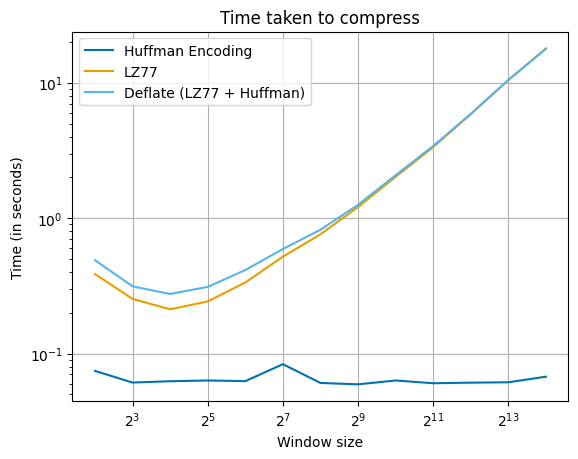

In [18]:
# Plot timings

window_size = df['Window Size']
huffman_time = df['Huffman Time']
lz77_time = df['LZ77 Time']
deflate_time = df['Deflate Time']


plt.plot(window_size, huffman_time, label='Huffman Encoding', color=colors[0])
plt.plot(window_size, lz77_time, label='LZ77', color=colors[1])
plt.plot(window_size, deflate_time, label='Deflate (LZ77 + Huffman)', color=colors[2])

plt.title('Time taken to compress')
plt.xlabel('Window size')
plt.xscale('log', base=2)
plt.yscale('log')
plt.ylabel('Time (in seconds)')
plt.legend()
plt.grid(True)
plt.show()

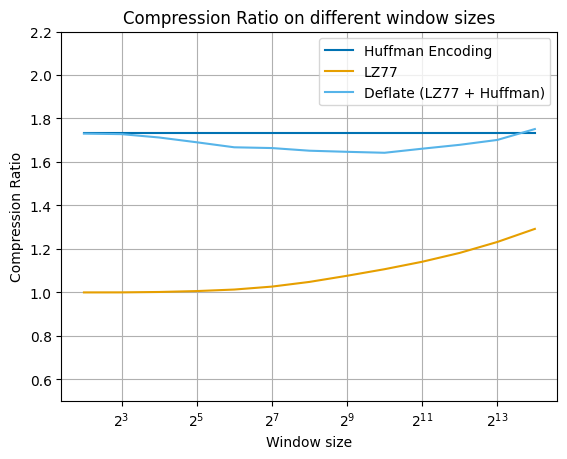

In [16]:
# Plot compression ratio

window_size = df['Window Size']
huffman_ratio = df['Huffman Ratio']
lz77_ratio = df['LZ77 Ratio']
deflate_ratio = df['Deflate Ratio']


plt.plot(window_size, huffman_ratio, label='Huffman Encoding', color=colors[0])
plt.plot(window_size, lz77_ratio, label='LZ77', color=colors[1])
plt.plot(window_size, deflate_ratio, label='Deflate (LZ77 + Huffman)', color=colors[2])

plt.title('Compression Ratio on different window sizes')
plt.xscale('log', base=2)
plt.xlabel('Window size')
plt.ylim(0.5, 2.2)
plt.ylabel('Compression Ratio')
plt.legend()
plt.grid(True)
plt.show()

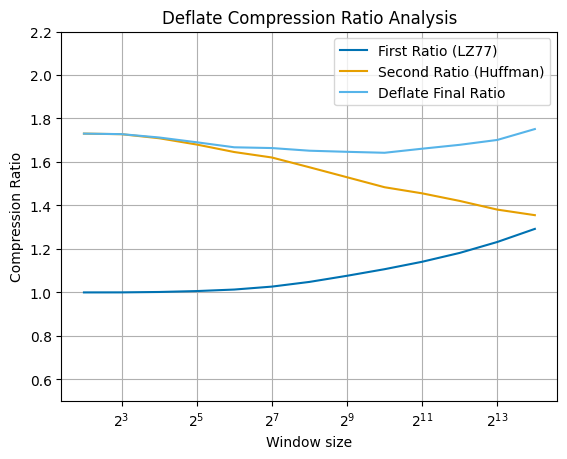

In [17]:
# Plot compression ratio of first and second step in Deflate

window_size = df['Window Size']
first_cr = df['First CR']
second_cr = df['Second CR']
deflate_final_cr = df['Deflate Ratio']


plt.plot(window_size, first_cr, label='First Ratio (LZ77)', color=colors[0])
plt.plot(window_size, second_cr, label='Second Ratio (Huffman)', color=colors[1])
plt.plot(window_size, deflate_final_cr, label='Deflate Final Ratio', color=colors[2])

plt.title('Deflate Compression Ratio Analysis')
plt.xscale('log', base=2)
plt.xlabel('Window size')
plt.ylim(0.5, 2.2)
plt.ylabel('Compression Ratio')
plt.legend()
plt.grid(True)
plt.show()